In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
from eval import *
import pandas as pd
import numpy as np
from table_evaluator import TableEvaluator

In [3]:
def get_data(path_real, path_fake, real_sep=';', fake_sep=',', drop_columns=None):
    real = pd.read_csv(path_real, sep=real_sep, low_memory=False)
    fake = pd.read_csv(path_fake, sep=fake_sep, low_memory=False)
    if set(fake.columns.tolist()).issubset(set(real.columns.tolist())):
        real = real[fake.columns]
    elif drop_columns is not None:
        real = real.drop(drop_columns, axis=1)
        try:
            fake = fake.drop(drop_columns, axis=1)
        except:
            print(f'Some of {drop_columns} were not found on fake.index.')
        assert len(fake.columns.tolist()) == len(real.columns.tolist()), f'Real and fake do not have same nr of columns: {len(fake.columns)} and {len(real.columns)}'
        fake.columns = real.columns
    else:
        fake.columns = real.columns
        
    for col in fake.columns:
        fake[col] = fake[col].astype(real[col].dtype)
    return real, fake

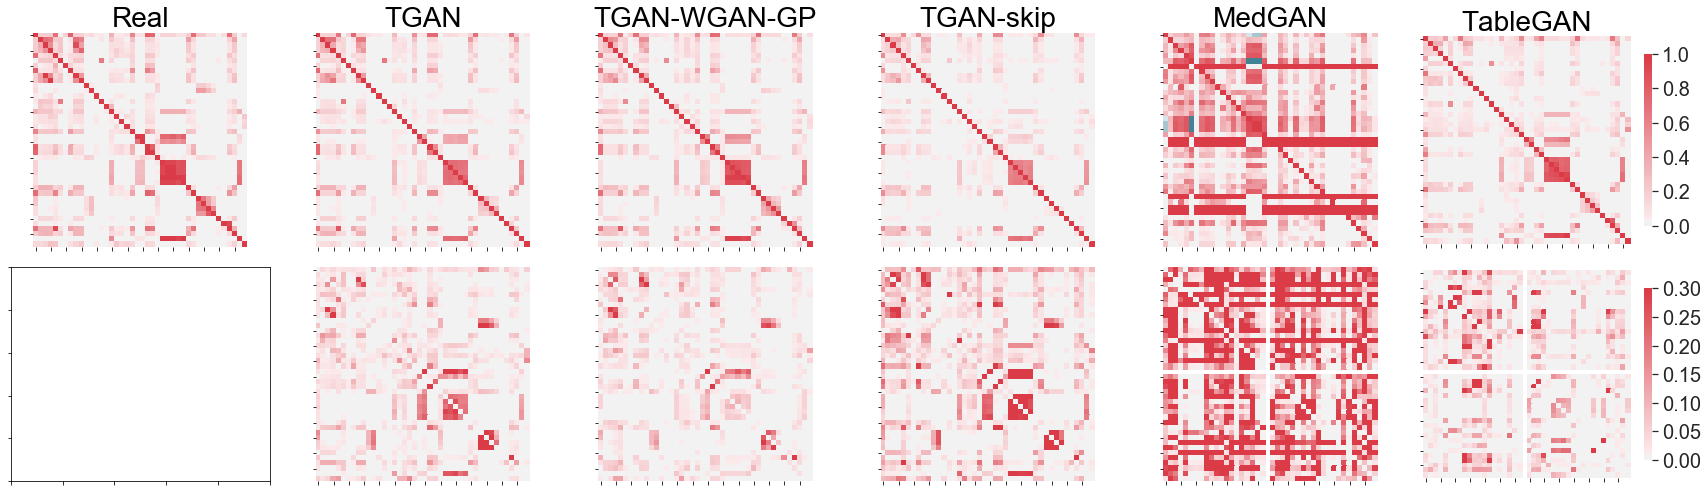

In [9]:
evaluators = [tgan_evaluator, wgan_evaluator, skip_evaluator, medgan_evaluator, tablegan_evaluator]
plot_correlation_comparison(evaluators, annot=False)
plt.savefig('../Master-Thesis/images/results/census_correlation.png')

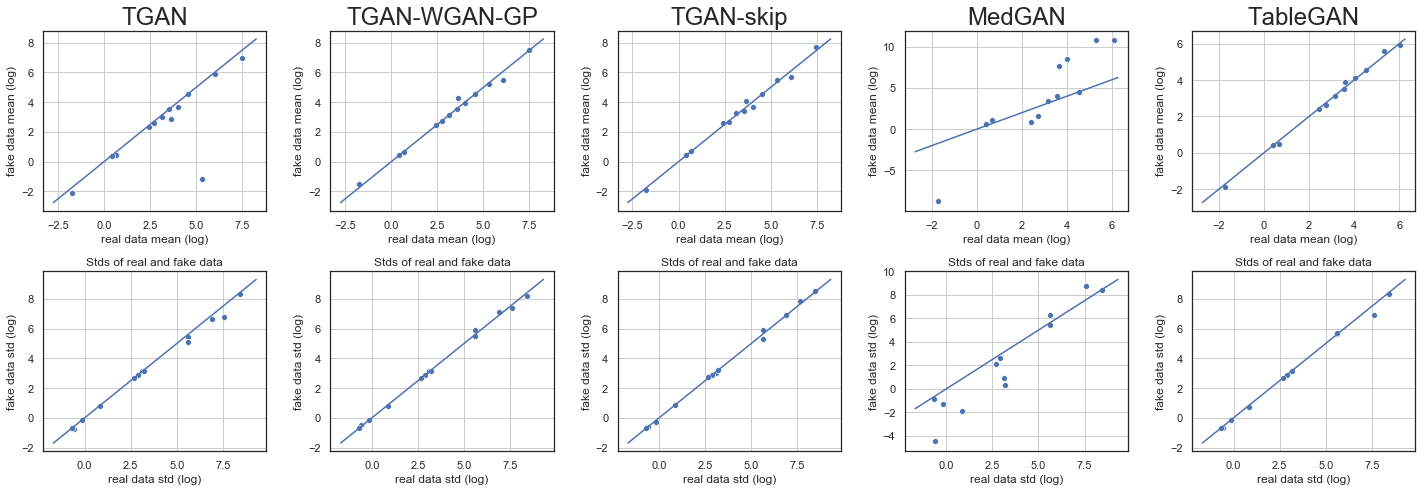

In [26]:
plot_mean_std_comparison(evaluators)
plt.savefig('../Master-Thesis/images/results/census_mean_std.png')

# Census

## Original TGAN

In [27]:
real, fake = get_data('../data/census/census_cat.csv', '../final_data/census/census_sample_tgan.csv', real_sep=',')
real, fake = real.drop(['instance weight'], axis=1), fake.drop(['instance weight'], axis=1)
tgan_evaluator = DataEvaluator(real, fake)

In [28]:
tgan_evaluator_2 = TableEvaluator(real, fake)
tgan_evaluator_2.get_copies(return_len=True)

21421

In [27]:
tgan_evaluator.statistical_evaluation()

0.9212121212121214

In [26]:
tgan_evaluator.get_copies().head()

Nr copied columns: 21421


age   class of worker  detailed industry recode  \
1     3   Not in universe                         0   
4    49   Not in universe                         0   
9    35   Not in universe                         0   
24   10   Not in universe                         0   
29    5   Not in universe                         0   

    detailed occupation recode                    education  wage per hour  \
1                            0                     Children              0   
4                            0   Bachelors degree(BA AB BS)              0   
9                            0         High school graduate              0   
24                           0                     Children              0   
29                           0                     Children              0   

   enroll in edu inst last wk                      marital stat  \
1             Not in universe                     Never married   
4             Not in universe   Married-civilian spouse present   
9             Not in universe   Married-civilian spouse present   
24            Not in universe                     Never married   
29            Not in universe                     Never married   

             major industry code major occupation code  ...  \
1    Not in universe or children       Not in universe  ...   
4    Not in universe or children       Not in universe  ...   
9    Not in universe or children       Not in universe  ...   
24   Not in universe or children       Not in universe  ...   
29   Not in universe or children       Not in universe  ...   

   country of birth father country of birth mother country of birth self  \
1            United-States           United-States         United-States   
4            United-States           United-States         United-States   
9            United-States           United-States         United-States   
24           United-States           United-States         United-States   
29           United-States           United-States         United-States   

                           citizenship own business or self employed  \
1    Native- Born in the United States                             0   
4    Native- Born in the United States                             0   
9    Native- Born in the United States                             0   
24   Native- Born in the United States                             0   
29   Native- Born in the United States                             0   

   fill inc questionnaire for veteran's admin  veterans benefits  \
1                             Not in universe                  0   
4                             Not in universe                  2   
9                             Not in universe                  2   
24                            Not in universe                  0   
29                            Not in universe                  0   

    weeks worked in year  year     income  
1                      0    95   - 50000.  
4                      0    95   - 50000.  
9                      0    95   - 50000.  
24                     0    94   - 50000.  
29                     0    94   - 50000.  

[5 rows x 41 columns]

In [19]:
tgan_evaluator.get_duplicates()

(24263, 27668)

In [11]:
tgan_evaluator.evaluate(target_col='income', verbose=False)


Correlation metric: pearsonr

Classifier F1-scores:
                                      real   fake
real_data_LogisticRegression_F1     0.9544 0.9434
real_data_RandomForestClassifier_F1 0.9520 0.9415
real_data_DecisionTreeClassifier_F1 0.9339 0.8931
real_data_MLPClassifier_F1          0.9422 0.9177
fake_data_LogisticRegression_F1     0.9560 0.9604
fake_data_RandomForestClassifier_F1 0.9572 0.9598
fake_data_DecisionTreeClassifier_F1 0.9332 0.9322
fake_data_MLPClassifier_F1          0.9334 0.9482

Miscellaneous results:
                                  Result
Column Correlation Distance RMSE  0.0684
Column Correlation distance MAE   0.0295
Duplicate rows between sets       2.0000
nearest neighbor mean             2.5287
nearest neighbor std              1.3957

Results:
Number of duplicate rows is ignored for total score.
                                                Result
basic statistics                                0.9212
Correlation column correlations                 0.9581

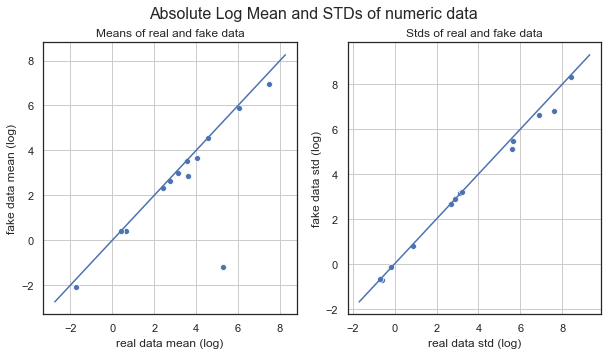

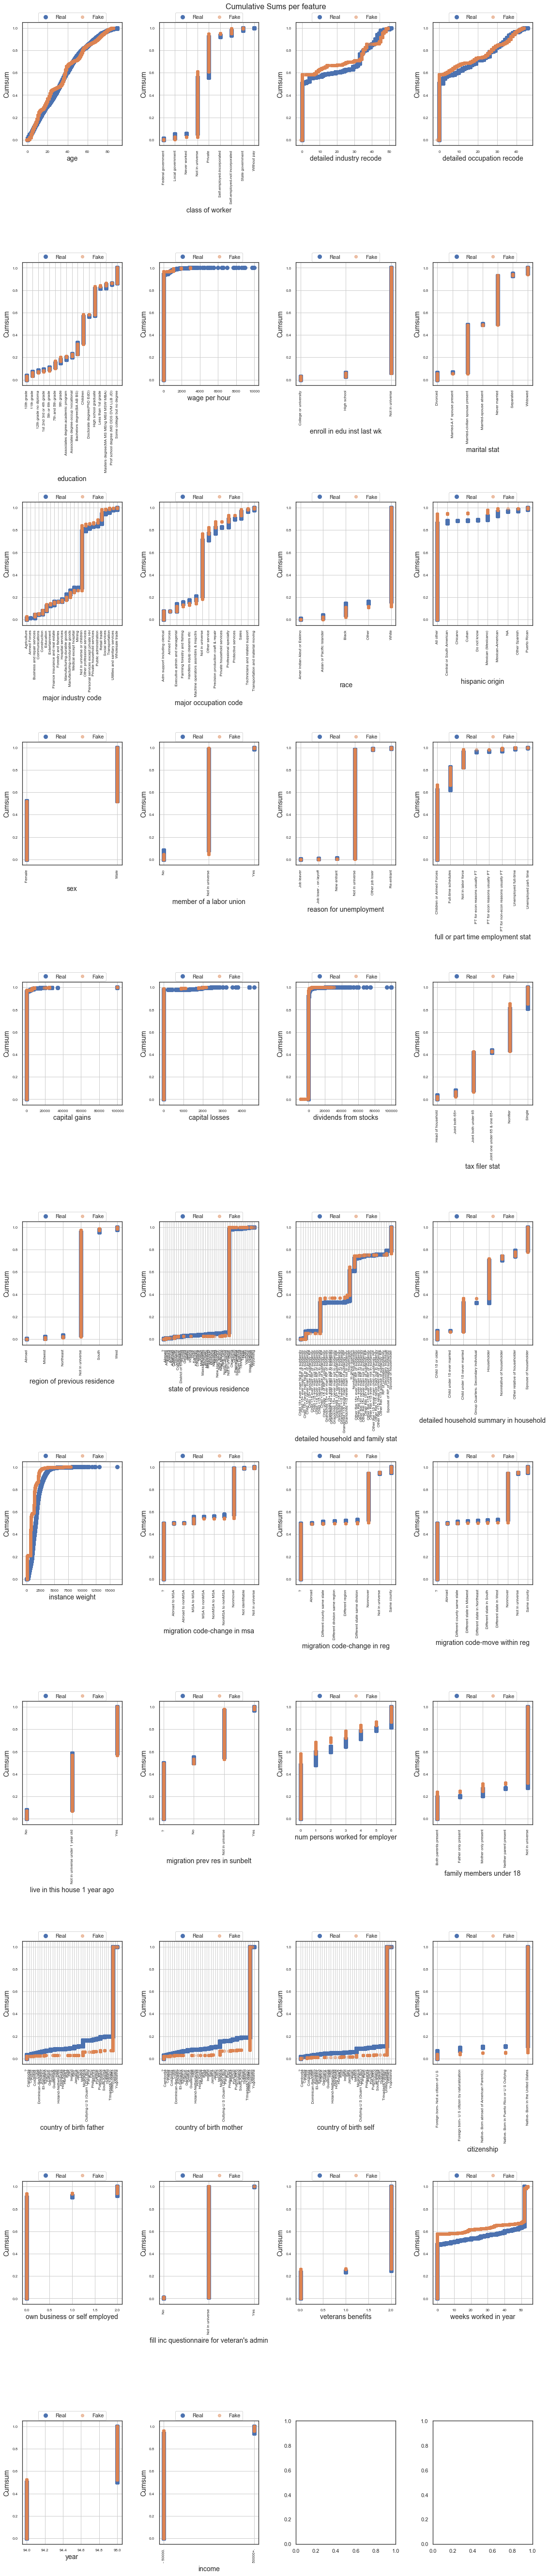

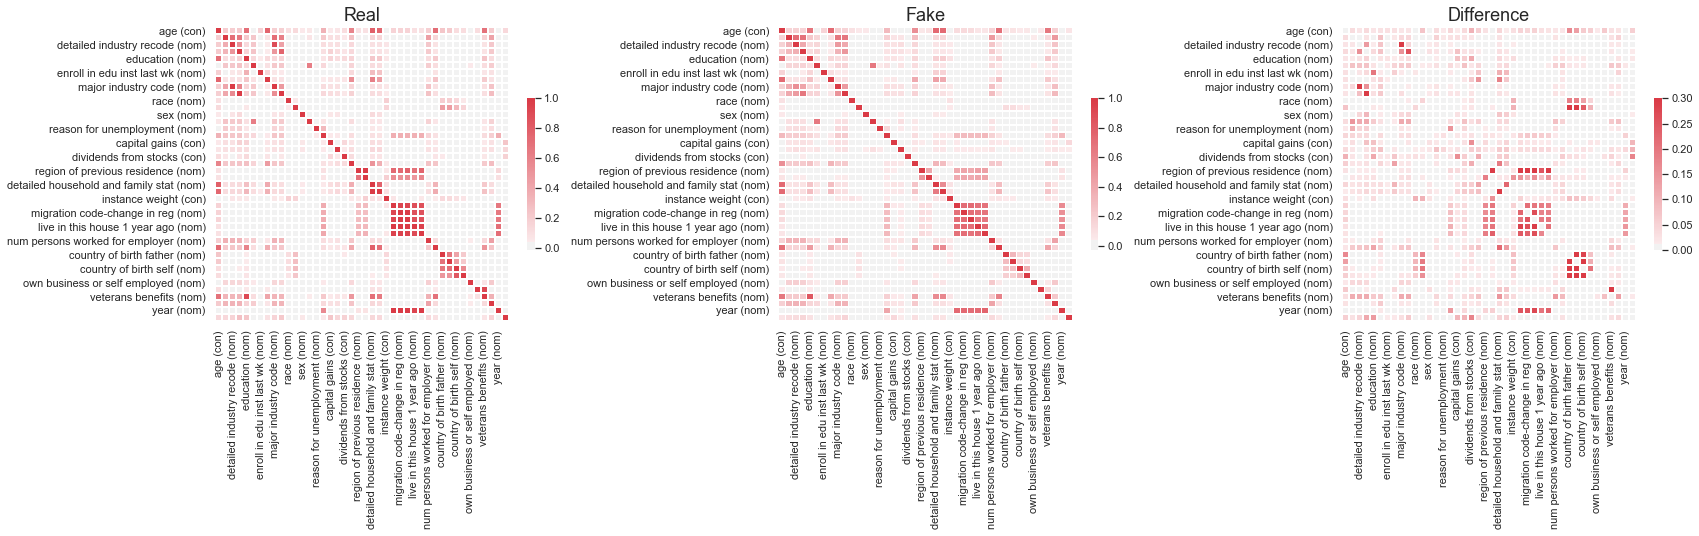

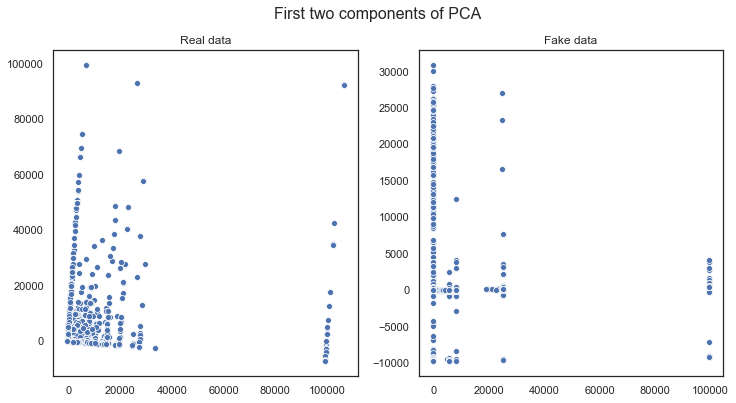

In [15]:
tgan_evaluator.visual_evaluation(annot=False)

## WGAN-GP Fixed

In [14]:
real, fake = get_data('../data/census/census_cat.csv', '../final_data/census/census_sample_tgan-wgan-gp.csv', real_sep=',')
real, fake = real.drop(['instance weight'], axis=1), fake.drop(['instance weight'], axis=1)
wgan_evaluator = DataEvaluator(real, fake)

In [15]:
wgan_evaluator_2 = TableEvaluator(real, fake)

In [17]:
wgan_evaluator_2.get_copies(return_len=True)

14820

In [32]:
wgan_evaluator.statistical_evaluation()

0.990909090909091

In [21]:
wgan_evaluator.get_copies()

Nr copied columns: 14820


age   class of worker  detailed industry recode  \
4       50   Not in universe                         0   
14       5   Not in universe                         0   
25       3   Not in universe                         0   
27       2   Not in universe                         0   
28       6   Not in universe                         0   
39       7   Not in universe                         0   
40       4   Not in universe                         0   
44       1   Not in universe                         0   
63      11   Not in universe                         0   
67      11   Not in universe                         0   
71      10   Not in universe                         0   
75       7   Not in universe                         0   
76       5   Not in universe                         0   
81       1   Not in universe                         0   
89       5   Not in universe                         0   
90       2   Not in universe                         0   
105     13   Not in universe                         0   
107      1   Not in universe                         0   
109      1   Not in universe                         0   
117      5   Not in universe                         0   
123      0   Not in universe                         0   
125     16   Not in universe                         0   
128      2   Not in universe                         0   
132     66   Not in universe                         0   
133     15   Not in universe                         0   
138      4   Not in universe                         0   
145      2   Not in universe                         0   
152     50   Not in universe                         0   
157      7   Not in universe                         0   
159     10   Not in universe                         0   
...    ...               ...                       ...   
99809    1   Not in universe                         0   
99814   68   Not in universe                         0   
99816   13   Not in universe                         0   
99824    5   Not in universe                         0   
99830    2   Not in universe                         0   
99832    6   Not in universe                         0   
99834    8   Not in universe                         0   
99847    7   Not in universe                         0   
99859    9   Not in universe                         0   
99860    8   Not in universe                         0   
99864    2   Not in universe                         0   
99865   10   Not in universe                         0   
99868    3   Not in universe                         0   
99870    7   Not in universe                         0   
99871   10   Not in universe                         0   
99872    6   Not in universe                         0   
99873   66   Not in universe                         0   
99888   12   Not in universe                         0   
99889    5   Not in universe                         0   
99900    6   Not in universe                         0   
99910   10   Not in universe                         0   
99919    8   Not in universe                         0   
99928   10   Not in universe                         0   
99932    9   Not in universe                         0   
99940   11   Not in universe                         0   
99943   41   Not in universe                         0   
99948    6   Not in universe                         0   
99953   10   Not in universe                         0   
99975    5   Not in universe                         0   
99982    0   Not in universe                         0   

       detailed occupation recode                    education  wage per hour  \
4                               0         High school graduate              0   
14                              0                     Children              0   
25                              0                     Children              0   
27                              0                     Children              0   
28   

In [22]:
wgan_evaluator.get_duplicates()

(24263, 18481)

In [13]:
wgan_evaluator.evaluate(target_col='income', verbose=False)


Correlation metric: pearsonr

Classifier F1-scores:
                                      real   fake
real_data_LogisticRegression_F1     0.9493 0.9422
real_data_RandomForestClassifier_F1 0.9486 0.9411
real_data_DecisionTreeClassifier_F1 0.9322 0.9051
real_data_MLPClassifier_F1          0.9332 0.8949
fake_data_LogisticRegression_F1     0.9301 0.9306
fake_data_RandomForestClassifier_F1 0.9302 0.9313
fake_data_DecisionTreeClassifier_F1 0.9059 0.9027
fake_data_MLPClassifier_F1          0.9163 0.9048

Miscellaneous results:
                                  Result
Column Correlation Distance RMSE  0.0495
Column Correlation distance MAE   0.0218
Duplicate rows between sets       2.0000
nearest neighbor mean             2.5867
nearest neighbor std              1.2547

Results:
Number of duplicate rows is ignored for total score.
                                                Result
basic statistics                                0.9909
Correlation column correlations                 0.9773

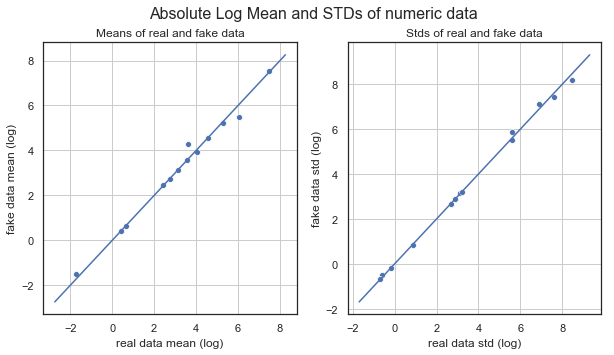

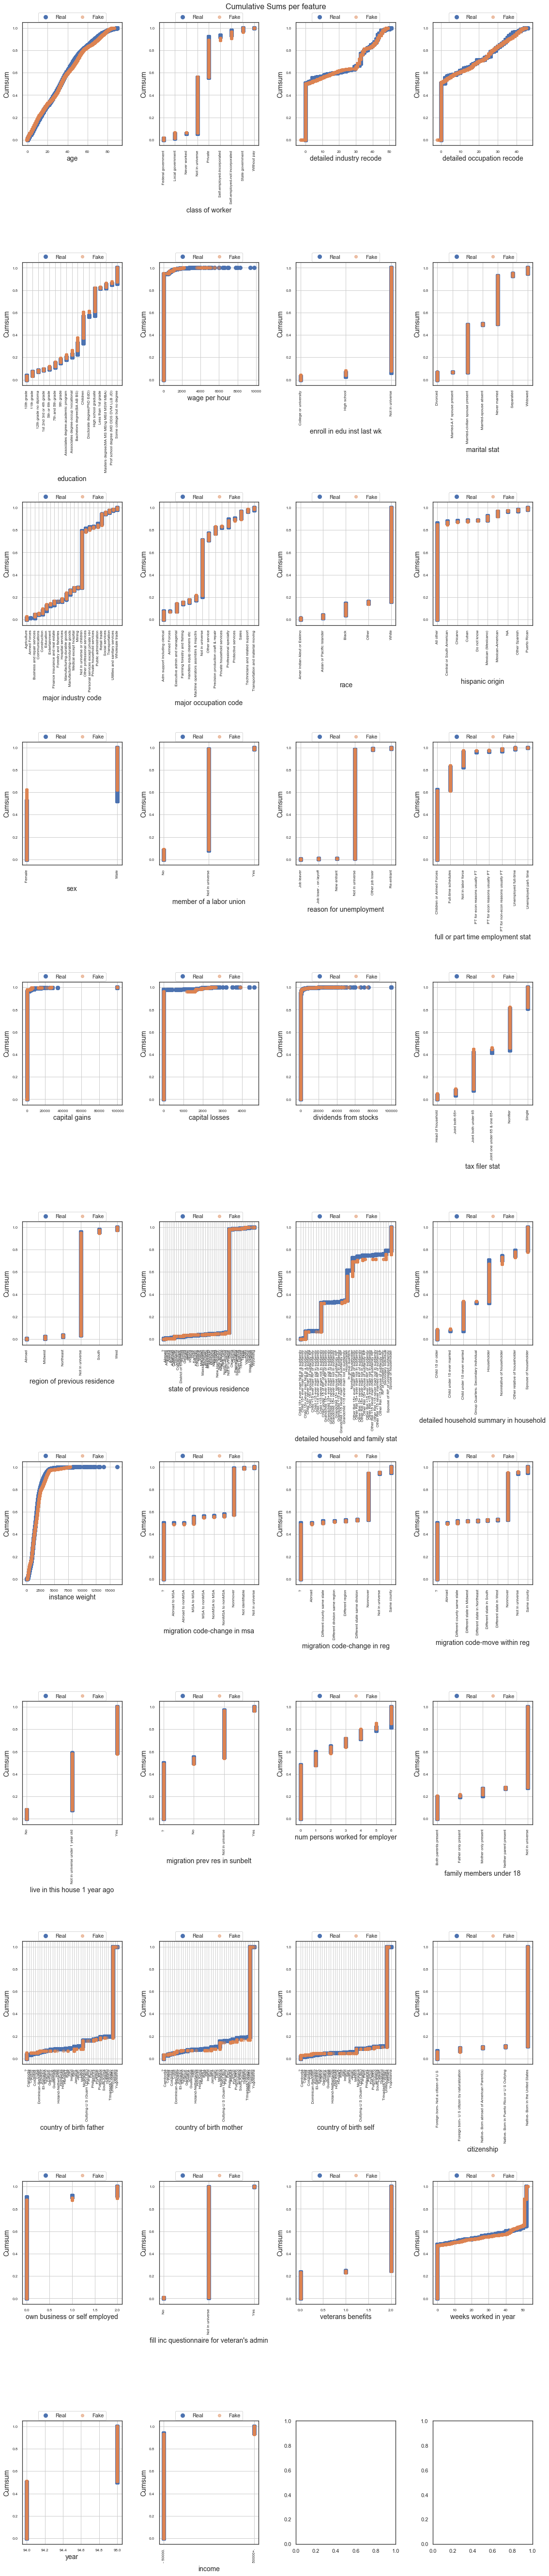

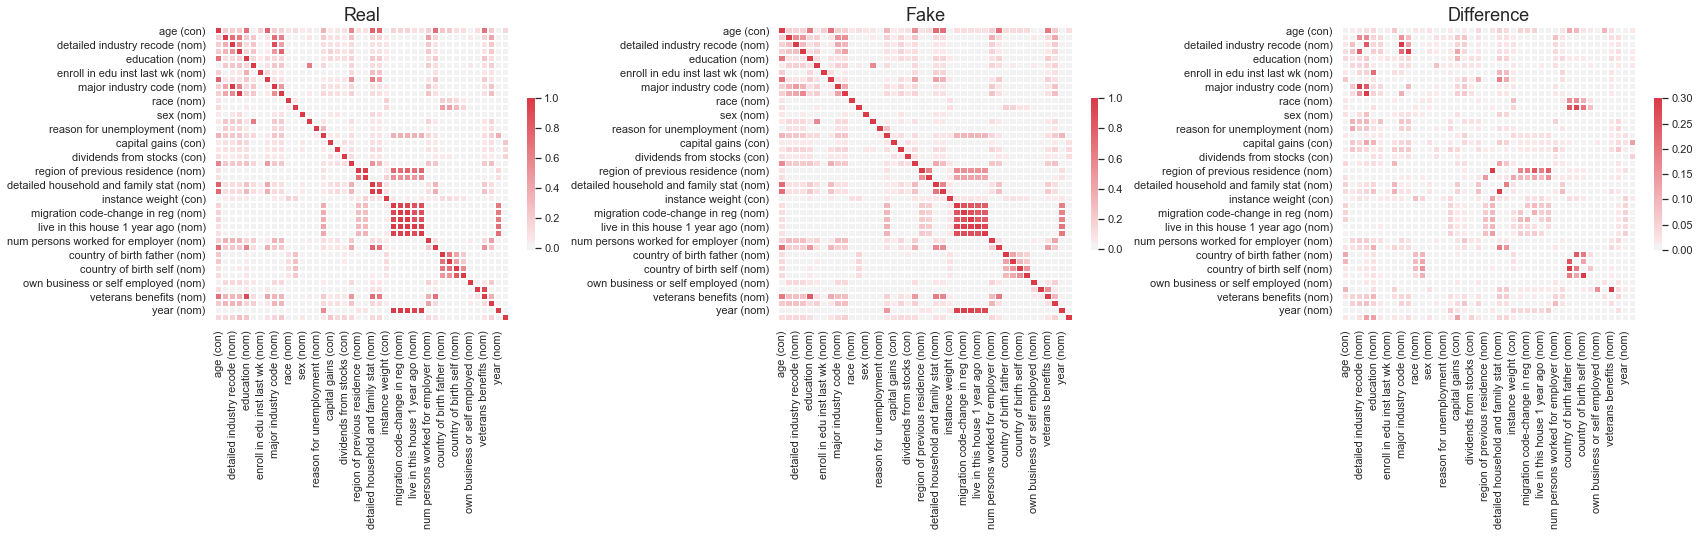

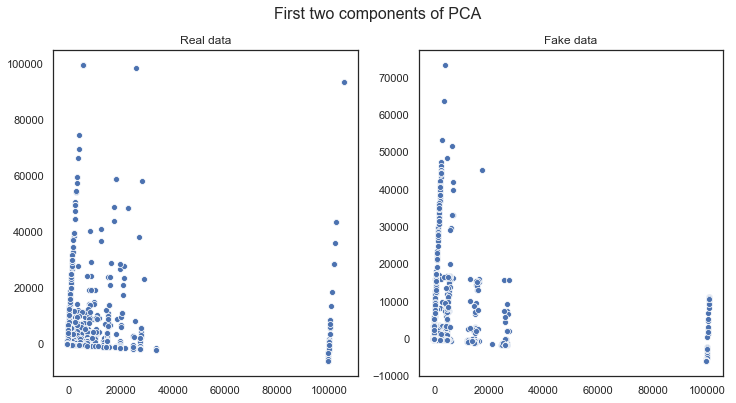

In [16]:
wgan_evaluator.visual_evaluation(annot=False)

## TGAN Skip Connections

In [18]:
real, fake = get_data('../data/census/census_cat.csv', '../final_data/census/census_sample_tgan-skip-connections-columns-corrected.csv', real_sep=',', fake_sep=';')
real, fake = real.drop(['instance weight'], axis=1), fake.drop(['instance weight'], axis=1)
skip_evaluator = DataEvaluator(real, fake)

In [21]:
skip_evaluator_2 = TableEvaluator(real, fake, verbose=True)

In [22]:
skip_evaluator_2.get_copies(return_len=True)

Nr copied columns: 5802


5802

In [29]:
skip_evaluator.statistical_evaluation()

0.9893939393939395

In [24]:
skip_evaluator.get_copies()

Nr copied columns: 5802


age   class of worker  detailed industry recode  \
10       7   Not in universe                         0   
16       5   Not in universe                         0   
40       0   Not in universe                         0   
41       0   Not in universe                         0   
42       3   Not in universe                         0   
103      4   Not in universe                         0   
108      4   Not in universe                         0   
117      1   Not in universe                         0   
132      2   Not in universe                         0   
135      1   Not in universe                         0   
137      8   Not in universe                         0   
173      4   Not in universe                         0   
179      1   Not in universe                         0   
191      1   Not in universe                         0   
238      2   Not in universe                         0   
250     22   Not in universe                         0   
284      4   Not in universe                         0   
285      2   Not in universe                         0   
319      4   Not in universe                         0   
326      6   Not in universe                         0   
334     10   Not in universe                         0   
345      2   Not in universe                         0   
347     67   Not in universe                         0   
361      4   Not in universe                         0   
383      0   Not in universe                         0   
466      8   Not in universe                         0   
519      3   Not in universe                         0   
523      0   Not in universe                         0   
528      3   Not in universe                         0   
542      2   Not in universe                         0   
...    ...               ...                       ...   
99345    0   Not in universe                         0   
99348    3   Not in universe                         0   
99349    0   Not in universe                         0   
99386    5   Not in universe                         0   
99410    4   Not in universe                         0   
99439    2   Not in universe                         0   
99458    3   Not in universe                         0   
99469    3   Not in universe                         0   
99494    1   Not in universe                         0   
99505    0   Not in universe                         0   
99520   60   Not in universe                         0   
99528    3   Not in universe                         0   
99541   69   Not in universe                         0   
99549    3   Not in universe                         0   
99557    3   Not in universe                         0   
99665   45   Not in universe                         0   
99669    2   Not in universe                         0   
99687    6   Not in universe                         0   
99696   74   Not in universe                         0   
99697    2   Not in universe                         0   
99708   62   Not in universe                         0   
99753    6   Not in universe                         0   
99818    1   Not in universe                         0   
99822    0   Not in universe                         0   
99823    0   Not in universe                         0   
99913    6   Not in universe                         0   
99934    2   Not in universe                         0   
99976    9   Not in universe                         0   
99991    3   Not in universe                         0   
99997    5   Not in universe                         0   

       detailed occupation recode                    education  wage per hour  \
10                              0                     Children              0   
16                              0                     Children              0   
40                              0                     Children              0   
41                              0                     Children              0   
42   

In [25]:
skip_evaluator.get_duplicates()

(24263, 8472)

In [34]:
skip_evaluator.evaluate(target_col='income', verbose=False)


Correlation metric: pearsonr

Classifier F1-scores:
                                      real   fake
real_data_LogisticRegression_F1     0.9526 0.9415
real_data_RandomForestClassifier_F1 0.9506 0.9408
real_data_DecisionTreeClassifier_F1 0.9342 0.8966
real_data_MLPClassifier_F1          0.9383 0.9081
fake_data_LogisticRegression_F1     0.9283 0.9306
fake_data_RandomForestClassifier_F1 0.9283 0.9294
fake_data_DecisionTreeClassifier_F1 0.8977 0.8834
fake_data_MLPClassifier_F1          0.8881 0.9003

Miscellaneous results:
                                  Result
Column Correlation Distance RMSE  0.1080
Column Correlation distance MAE   0.0490
Duplicate rows between sets       2.0000
nearest neighbor mean             2.4610
nearest neighbor std              1.4573

Results:
Number of duplicate rows is ignored for total score.
                                                Result
basic statistics                                0.9894
Correlation column correlations                 0.9053

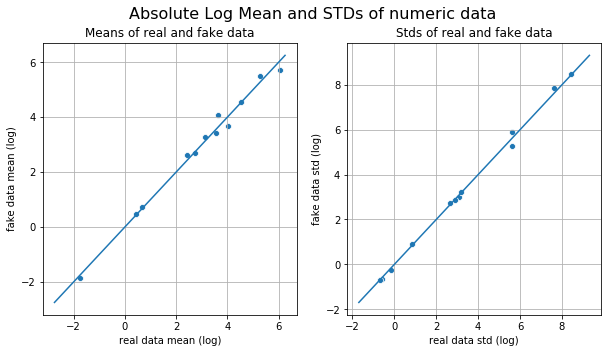

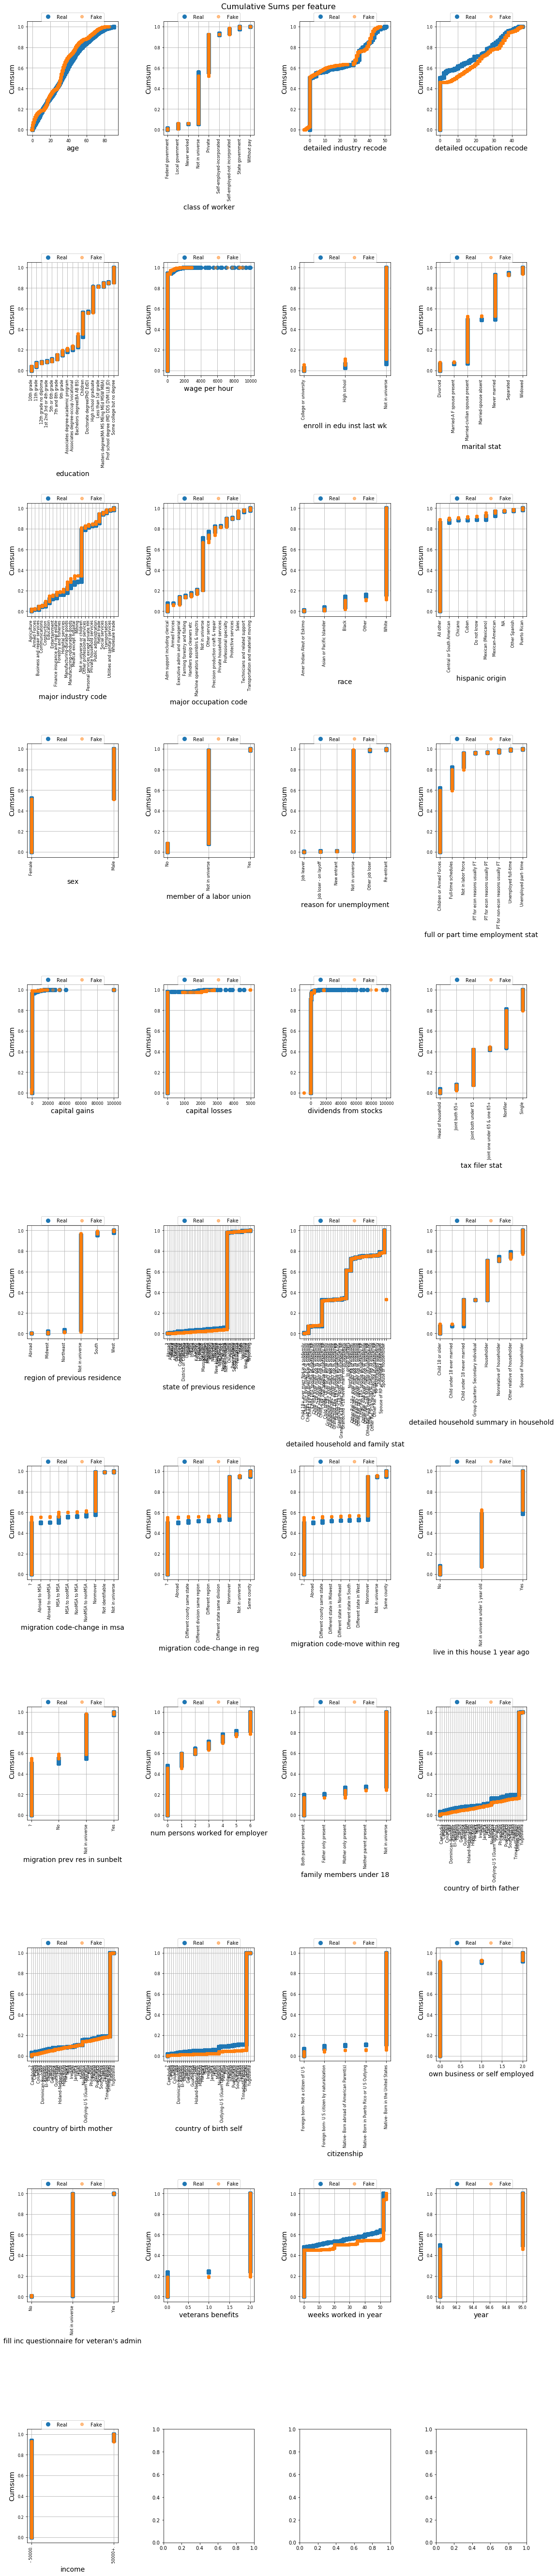

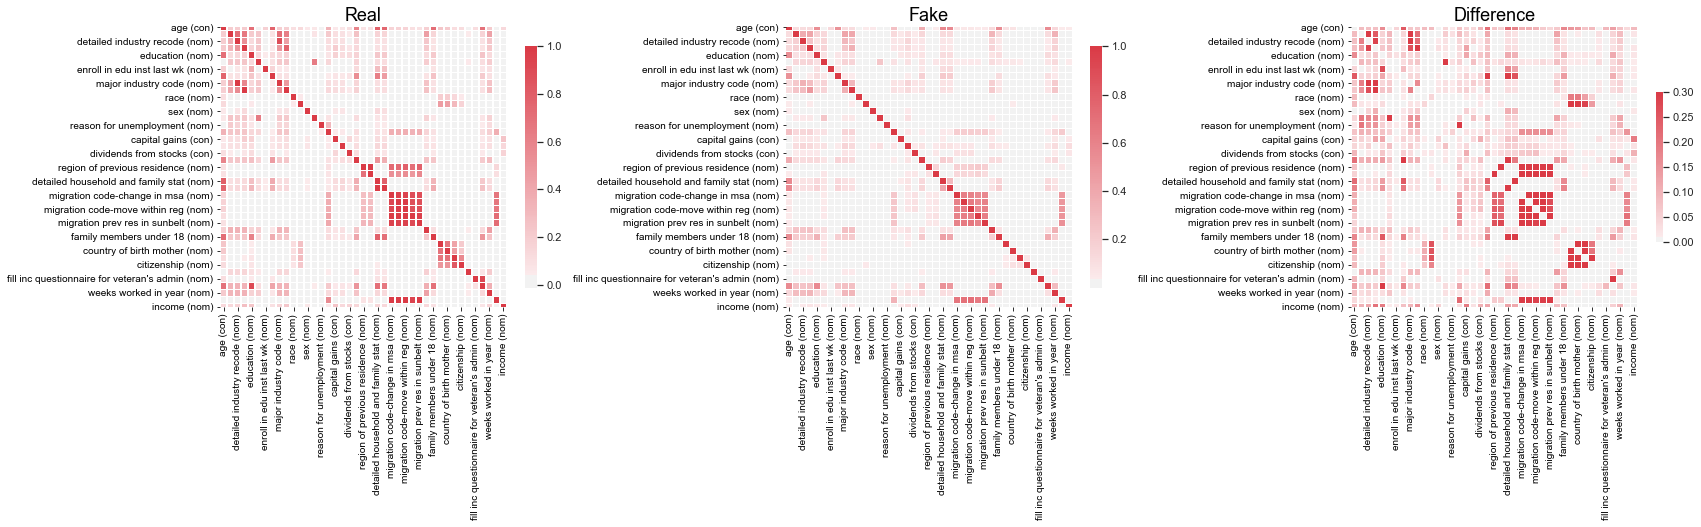

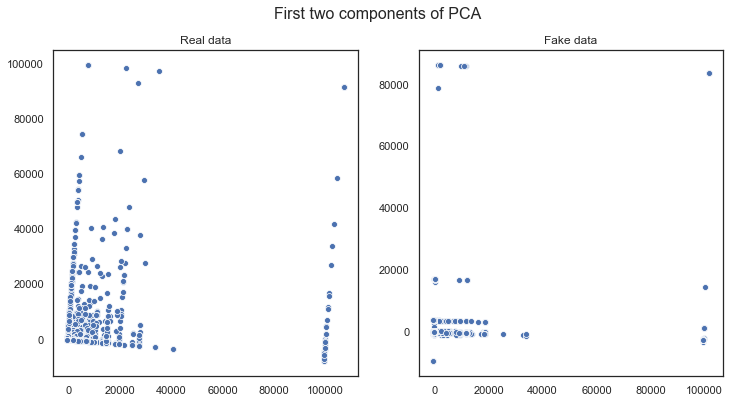

In [15]:
skip_evaluator.visual_evaluation(annot=False)

## MedGAN

In [25]:
real, fake = get_data('../data/census/census_cat.csv', '../final_data/census/sample_census_medgan_100.csv', real_sep=',')
real['income'] = real['income'].apply(lambda x: x[:-1].strip())
columns = real.select_dtypes(include=['object']).columns.tolist()
real[columns] = real[columns].apply(lambda x: x.str.strip())
medgan_evaluator = DataEvaluator(real, fake)

In [26]:
medgan_evaluator_2 = TableEvaluator(real, fake)
medgan_evaluator_2.get_copies(return_len=True)

0

In [30]:
medgan_evaluator.statistical_evaluation()

0.4324559092733985

In [5]:
medgan_evaluator.get_copies()

Nr copied columns: 0


Empty DataFrame
Columns: [age, class of worker, detailed industry recode, detailed occupation recode, education, wage per hour, enroll in edu inst last wk, marital stat, major industry code, major occupation code, race, hispanic origin, sex, member of a labor union, reason for unemployment, full or part time employment stat, capital gains, capital losses, dividends from stocks, tax filer stat, region of previous residence, state of previous residence, detailed household and family stat, detailed household summary in household, migration code-change in msa, migration code-change in reg, migration code-move within reg, live in this house 1 year ago, migration prev res in sunbelt, num persons worked for employer, family members under 18, country of birth father, country of birth mother, country of birth self, citizenship, own business or self employed, fill inc questionnaire for veteran's admin, veterans benefits, weeks worked in year, year, income]
Index: []

[0 rows x 41 columns]

In [11]:
medgan_evaluator.real.sample(100).sort_values('age')

age             class of worker  detailed industry recode  \
16537    1             Not in universe                         0   
47531    2             Not in universe                         0   
58486    2             Not in universe                         0   
60479    3             Not in universe                         0   
99210    3             Not in universe                         0   
4914     4             Not in universe                         0   
15626    5             Not in universe                         0   
80624    5             Not in universe                         0   
46902    9             Not in universe                         0   
49244    9             Not in universe                         0   
92733   11             Not in universe                         0   
7630    11             Not in universe                         0   
21155   12             Not in universe                         0   
78157   12             Not in universe                         0   
77317   13             Not in universe                         0   
17250   14             Not in universe                         0   
52968   14             Not in universe                         0   
46149   15             Not in universe                         0   
61751   16             Not in universe                         0   
21919   18             Not in universe                         0   
91736   19                 Without pay                         2   
63838   21                     Private                        33   
63732   22                     Private                        37   
42399   23                     Private                        33   
9881    23                     Private                        39   
94796   24                     Private                        45   
17480   24                     Private                        25   
97144   24                     Private                        35   
72440   25            State government                        41   
11490   26                     Private                        43   
...    ...                         ...                       ...   
45492   53                     Private                        33   
32594   54                     Private                        42   
97859   54                     Private                        21   
19235   55                     Private                        33   
91296   57             Not in universe                         0   
28347   58                     Private                        44   
8554    59                     Private                        12   
551     59                     Private                        37   
73214   59             Not in universe                         0   
47203   60             Not in universe                         0   
18855   63             Not in universe                         0   
49129   63                     Private                        33   
74481   63                     Private                         4   
49670   64             Not in universe                         0   
82648   64                     Private                        33   
41776   64                     Private                        19   
11072   64             Not in universe                         0   
483     66             Not in universe                         0   
85073   66             Not in universe                         0   
40406   68  Self-employed-incorporated                        35   
2354    68             Not in universe                         0   
68103   70             Not in universe                         0   
1087    70             Not in universe                         0   
119     71             Not in universe                         0   
67700   74             Not in universe                         0   
78960   76             Not in universe                         0   
20704   76             Not in universe                         

In [6]:
medgan_evaluator.get_duplicates()

(24263, 23115)

In [ ]:
medgan_evaluator.estimator_evaluation(target_col='income')

In [8]:
d = medgan_evaluator.estimators_scores.drop(['fake_data_LogisticRegression_F1', 'fake_data_DecisionTreeClassifier_F1'])

In [9]:
1 - mean_absolute_percentage_error(d['real'], d['fake'])

0.9114559629821766

In [17]:
medgan_evaluator.evaluate(target_col='income', verbose=False)


Correlation metric: pearsonr

Classifier F1-scores:
                                      real   fake
real_data_LogisticRegression_F1     0.9506 0.9240
real_data_RandomForestClassifier_F1 0.9499 0.9369
real_data_DecisionTreeClassifier_F1 0.9326 0.5664
real_data_MLPClassifier_F1          0.9393 0.9228
fake_data_LogisticRegression_F1     0.0009 0.9998
fake_data_RandomForestClassifier_F1 0.9731 0.9994
fake_data_DecisionTreeClassifier_F1 0.0041 0.9994
fake_data_MLPClassifier_F1          0.0009 0.9990

Miscellaneous results:
                                  Result
Column Correlation Distance RMSE  0.4342
Column Correlation distance MAE   0.2801
Duplicate rows between sets       2.0000
nearest neighbor mean             5.5132
nearest neighbor std              1.2824

Results:
Number of duplicate rows is ignored for total score.
                                                  Result
basic statistics                                  0.4325
Correlation column correlations                   

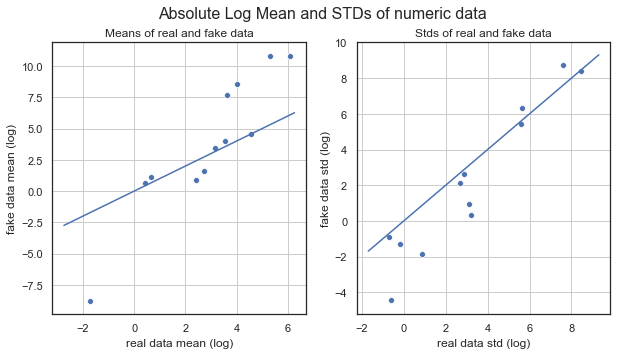

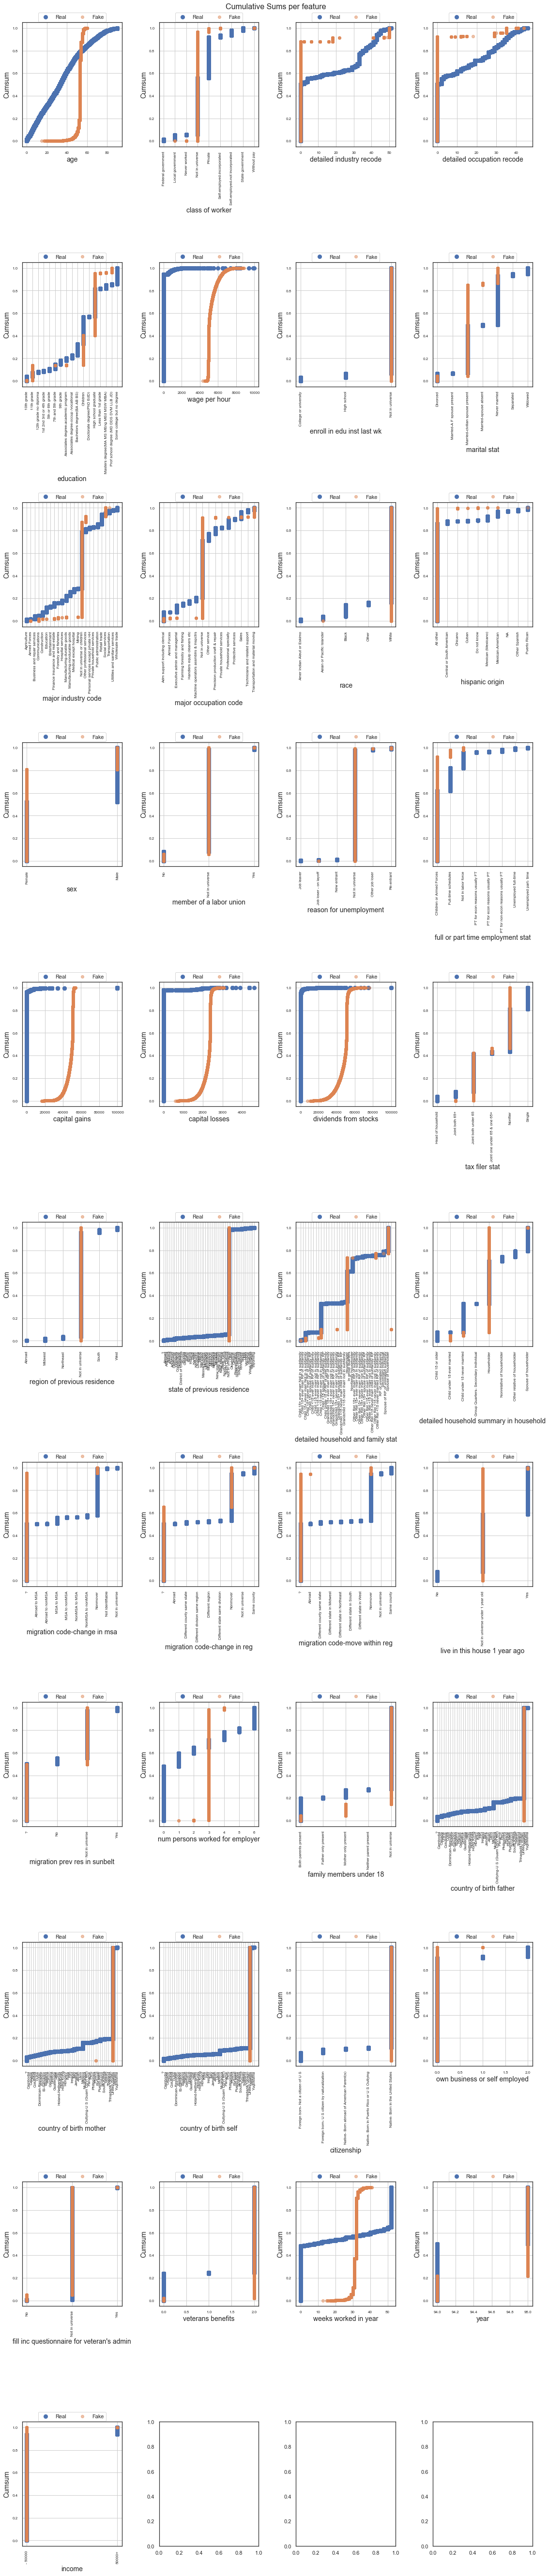

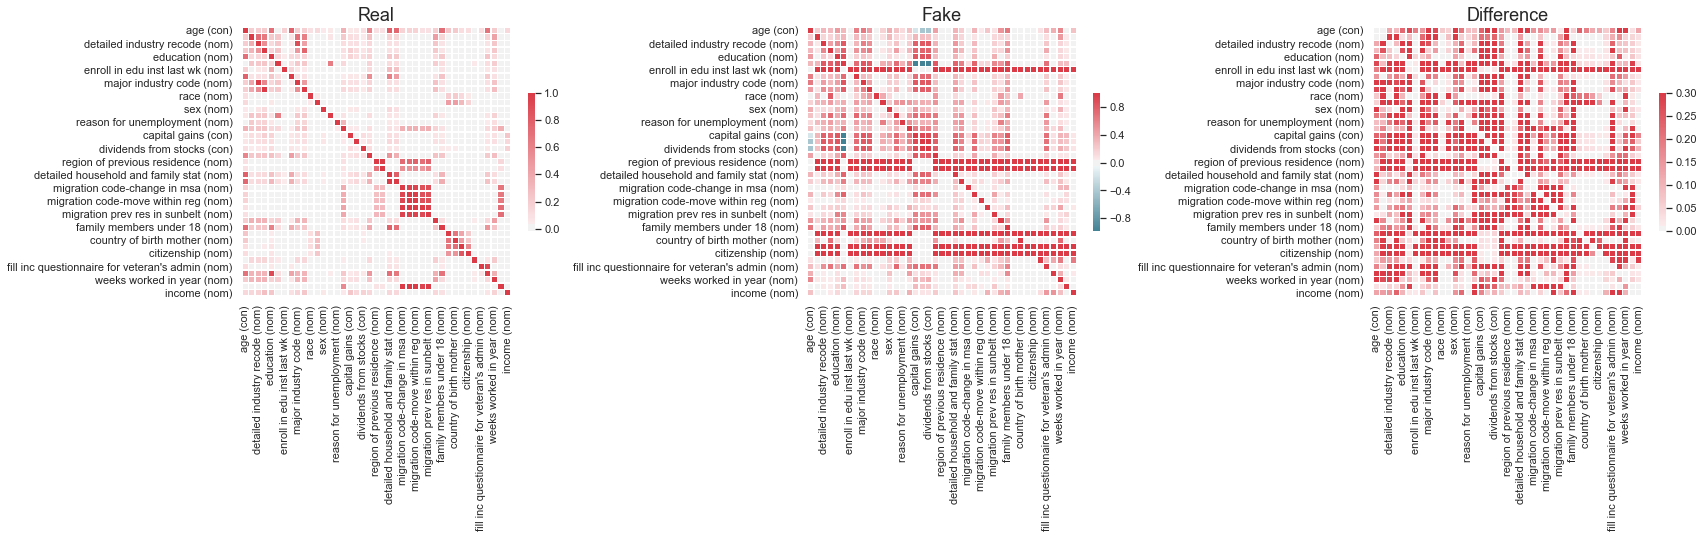

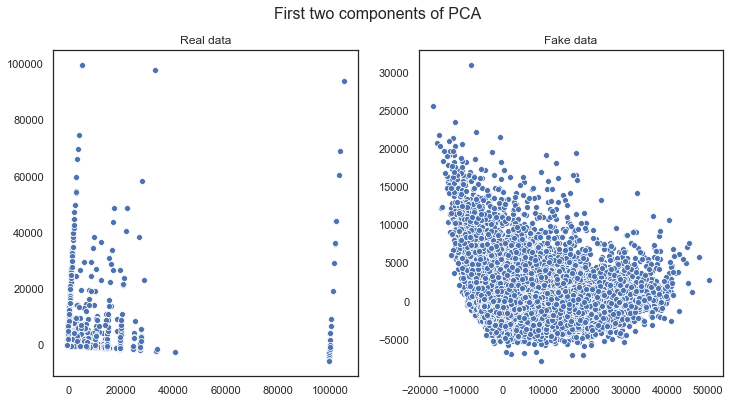

In [12]:
medgan_evaluator.visual_evaluation(annot=False)

## TableGAN

In [18]:
real, fake = get_data('../data/census/census_cat.csv', '../final_data/census/sample_census_tablegan_100.csv', real_sep=',')
real['income'] = real['income'].apply(lambda x: x[:-1].strip())
fake.loc[fake['hispanic origin'].isna(), 'hispanic origin'] = 'NA'
columns = real.select_dtypes(include=['object']).columns.tolist()
real[columns] = real[columns].apply(lambda x: x.str.strip())
tablegan_evaluator = DataEvaluator(real, fake, n_samples=100000)

In [31]:
tablegan_evaluator.statistical_evaluation()

0.9947115520612058

In [33]:
tablegan_evaluator.get_copies()

Nr copied columns: 1359


age  class of worker  detailed industry recode  \
196      7  Not in universe                         0   
288      1  Not in universe                         0   
328      4  Not in universe                         0   
585      0  Not in universe                         0   
623      7  Not in universe                         0   
732      3  Not in universe                         0   
743      4  Not in universe                         0   
764      2  Not in universe                         0   
771      1  Not in universe                         0   
813      1  Not in universe                         0   
945      0  Not in universe                         0   
994      7  Not in universe                         0   
1000     1  Not in universe                         0   
1021     3  Not in universe                         0   
1056     4  Not in universe                         0   
1134    12  Not in universe                         0   
1336     1  Not in universe                         0   
1424     3  Not in universe                         0   
1493    47  Not in universe                         0   
1618    65  Not in universe                         0   
1639    10  Not in universe                         0   
1697     2  Not in universe                         0   
1768     3  Not in universe                         0   
1912     1  Not in universe                         0   
1919     0  Not in universe                         0   
2100     0  Not in universe                         0   
2186     1  Not in universe                         0   
2204     2  Not in universe                         0   
2308     3  Not in universe                         0   
2314     6  Not in universe                         0   
...    ...              ...                       ...   
97353    2  Not in universe                         0   
97393    0  Not in universe                         0   
97533   56  Not in universe                         0   
97591   12  Not in universe                         0   
97639   44  Not in universe                         0   
97800    2  Not in universe                         0   
97848   83  Not in universe                         0   
97873    0  Not in universe                         0   
97938    1  Not in universe                         0   
98025    0  Not in universe                         0   
98035    2  Not in universe                         0   
98344    1  Not in universe                         0   
98565    1  Not in universe                         0   
98820    2  Not in universe                         0   
98833    1  Not in universe                         0   
98854    2  Not in universe                         0   
98858    3  Not in universe                         0   
98976    2  Not in universe                         0   
99096    1  Not in universe                         0   
99099    6  Not in universe                         0   
99258    3  Not in universe                         0   
99328   33  Not in universe                         0   
99332    8  Not in universe                         0   
99564    8  Not in universe                         0   
99694    4  Not in universe                         0   
99742    0  Not in universe                         0   
99814    1  Not in universe                         0   
99831    2  Not in universe                         0   
99936    2  Not in universe                         0   
99976    7  Not in universe                         0   

       detailed occupation recode                   education  wage per hour  \
196                             0                    Children              0   
288                             0                    Children              0   
328                             0                    Children              0   
585                             0                    Children              0   
623                             0                    Children           

In [13]:
tablegan_evaluator.get_duplicates()

(24263, 3356)

In [17]:
tablegan_evaluator.pca_correlation()

0.9946618717587166

In [19]:
tablegan_evaluator.evaluate(target_col='income', verbose=False)


Correlation metric: pearsonr

Classifier F1-scores:
                                      real   fake
real_data_LogisticRegression_F1     0.9488 0.9319
real_data_RandomForestClassifier_F1 0.9468 0.9387
real_data_DecisionTreeClassifier_F1 0.9322 0.9312
real_data_MLPClassifier_F1          0.9376 0.9258
fake_data_LogisticRegression_F1     0.9275 0.9637
fake_data_RandomForestClassifier_F1 0.9253 0.9610
fake_data_DecisionTreeClassifier_F1 0.8835 0.9609
fake_data_MLPClassifier_F1          0.9169 0.9687

Miscellaneous results:
                                  Result
Column Correlation Distance RMSE  0.0865
Column Correlation distance MAE   0.0365
Duplicate rows between sets       2.0000
nearest neighbor mean             2.6169
nearest neighbor std              1.5131

Results:
Number of duplicate rows is ignored for total score.
                                                Result
basic statistics                                0.9947
Correlation column correlations                 0.9128

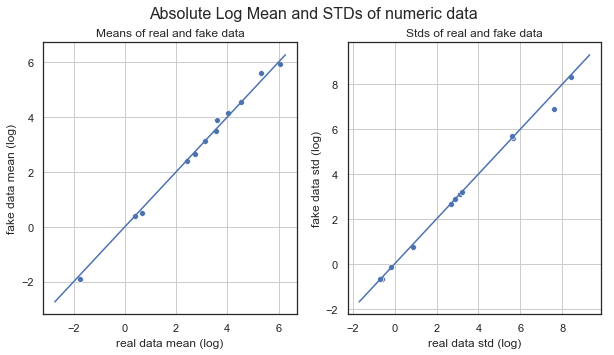

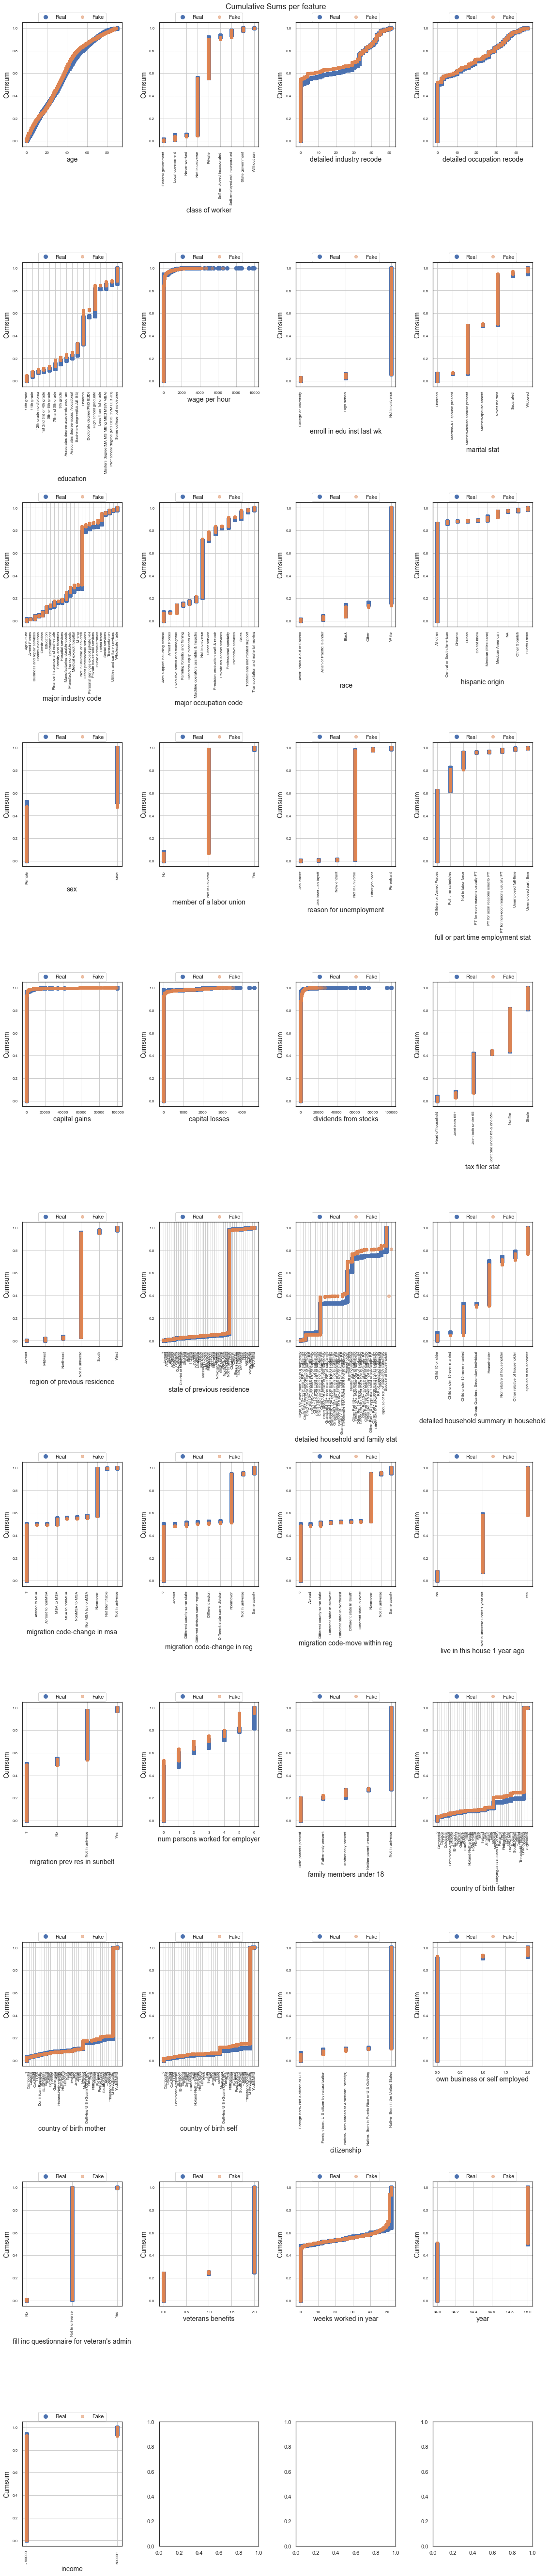

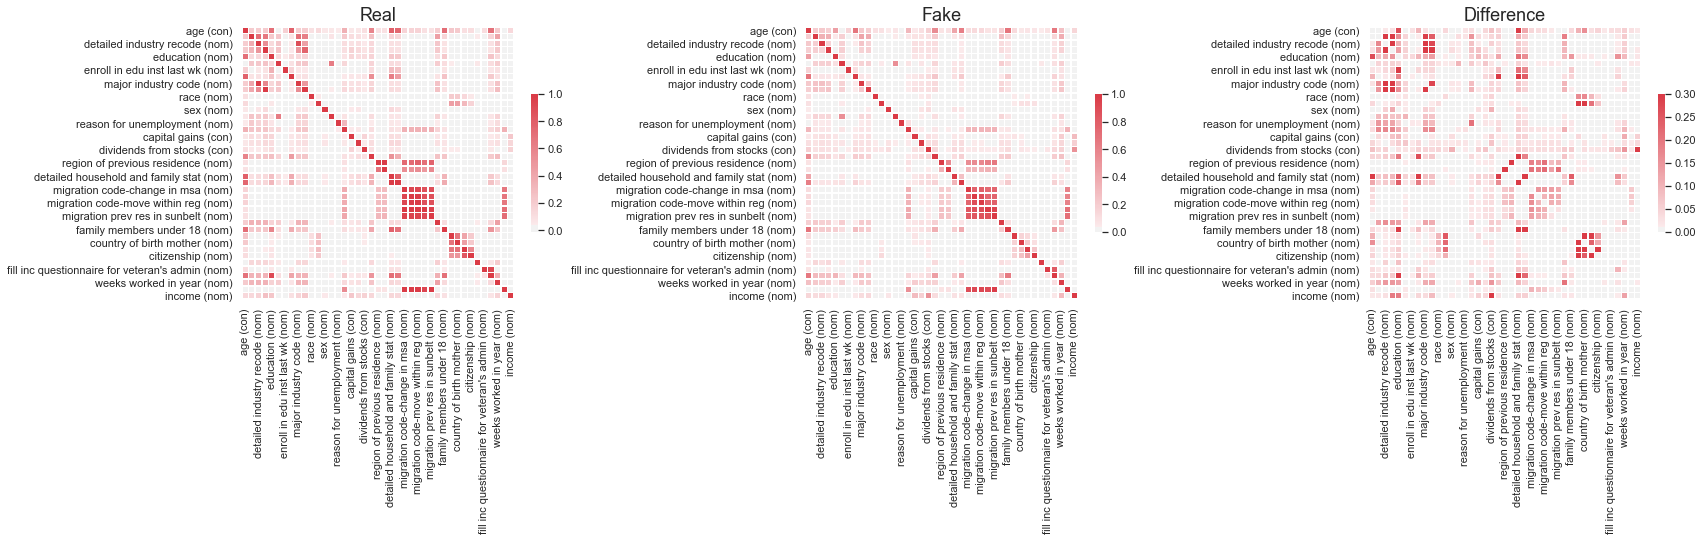

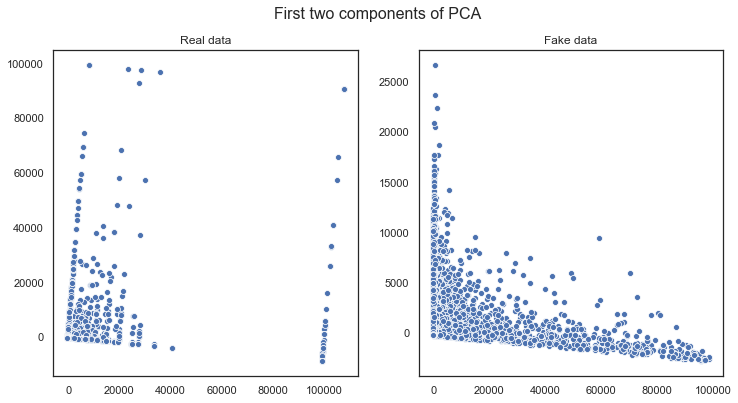

In [14]:
tablegan_evaluator.visual_evaluation(annot=False)

## Feature Importance

In [27]:
target_col = 'income'
x = numerical_encoding(tgan_evaluator.fake.drop([target_col], axis=1), nominal_columns=tgan_evaluator.categorical_columns)

IndexError: index 361 is out of bounds for axis 0 with size 349

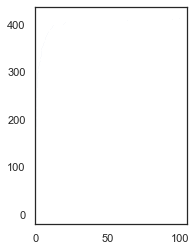

In [30]:
feature_importance = tgan_evaluator.r_estimators[2].feature_importances_
# print(feature_importance)
# feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
column_names = x.columns
# print(column_names)
# print(sorted_idx)
plt.yticks(pos, column_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

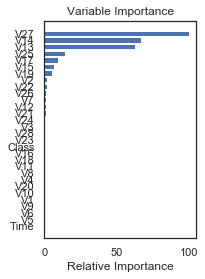

In [72]:
feature_importance = tgan_org_evaluator.r_estimators[0].feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
column_names = x.columns
plt.yticks(pos, column_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()